In [1]:
import pandas as pd
import numpy as np

# Exercise 1

In [13]:
data = pd.read_csv('invest.txt', sep=' ')
data.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


# Exercise 2

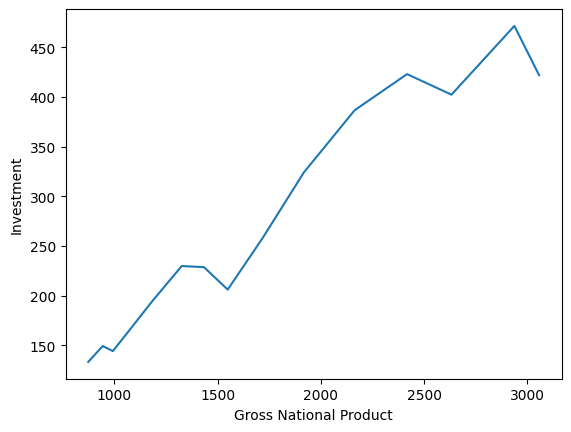

In [30]:
import matplotlib.pyplot as plt
plt.plot(data['gnp'], data['invest'])
plt.xlabel('Gross National Product')
plt.ylabel('Investment')
plt.show()

Log Transformation

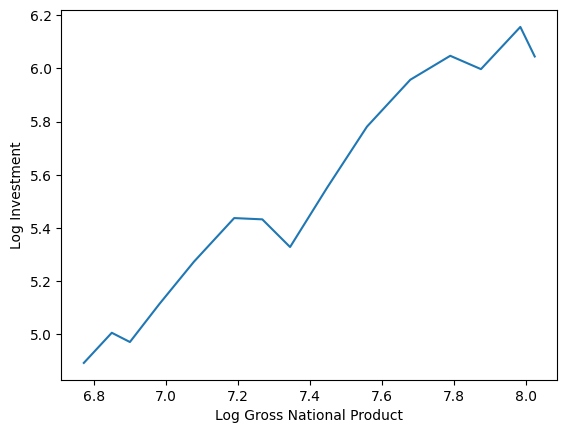

In [31]:
data['log_gnp'] = np.log(data['gnp'])
data['log_invest'] = np.log(data['invest'])
plt.plot(data['log_gnp'], data['log_invest'])
plt.xlabel('Log Gross National Product')
plt.ylabel('Log Investment')
plt.show()

# Exercise 3

beta0 =  -1.9635913352301815
beta1 =  1.015281401598871
std_beta0 =  0.4095472716623081
std_beta1 =  0.05538306035485281
Determination Coefficient =  0.9627572956057854


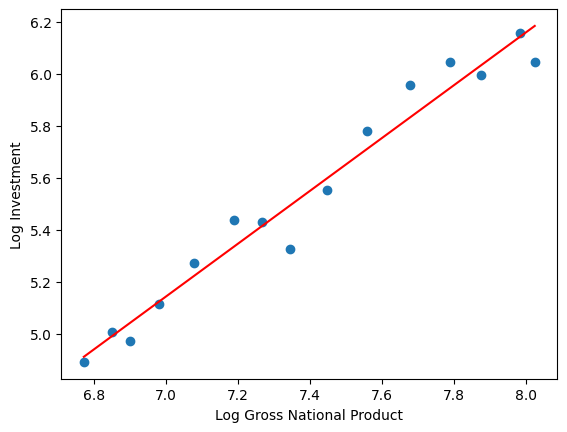

In [43]:
#Estimate intercept and slope
x, y = data['log_gnp'], data['log_invest']
beta1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
beta0 = np.mean(y) - beta1 * np.mean(x)

unbiased_estimator = np.sum((y - (beta0 + (beta1 * x))) ** 2) / (len(y) - 2)
var_beta0 = unbiased_estimator * (1 / len(y) + np.mean(x) ** 2 / np.sum((x - np.mean(x)) ** 2))
var_beta1 = unbiased_estimator / np.sum((x - np.mean(x)) ** 2)

print('beta0 = ', beta0)
print('beta1 = ', beta1)
print('std_beta0 = ', var_beta0 ** 0.5)
print('std_beta1 = ', var_beta1 ** 0.5)

yhat = beta0 + beta1 * data['log_gnp']

#Plot the data and the regression line
plt.plot(data['log_gnp'], data['log_invest'], 'o')
plt.plot(data['log_gnp'], yhat, 'r-')
plt.xlabel('Log Gross National Product')
plt.ylabel('Log Investment')

#Estimate the coefficient of determination
ssr = np.sum((yhat - np.mean(y)) ** 2)
sst = np.sum((y - np.mean(y)) ** 2)
r2 = ssr / sst
print('Determination Coefficient = ', r2)


# Exercise 4

In [47]:
#Student-t test
t_value = beta1 / (var_beta1 ** 0.5)
print('t = ', t_value)

from scipy.stats import t
p = 1 - t.cdf(t_value, len(y) - 2)
print('p = ', p)


t =  18.331984456866678
p =  5.681854986505641e-11


# Exercise 5